In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pylab as plt

In [2]:
test_y = np.load('./data/testall_y.npy')
true_y = np.load('./data/bert_true_y.npy')

In [5]:
with open('./data/prediction_cnnrl&cnn.npy', 'rb') as file:
    pred1 = np.load(file)
    pred2 = np.load(file)

pred_bert = np.load('./data/bert_pred_y.npy')

In [14]:
test_y_bert = np.zeros((len(true_y), 53))
for i in range(len(true_y)):
    test_y_bert[i, true_y[i]] = 1


(62859, 53)
(172448, 53)


In [26]:
bert_ans = np.argmax(pred_bert.reshape((len(test_y_bert), 53)), axis=1)
pred_bert = pred_bert.reshape((len(test_y_bert), 53))

In [35]:
np.argmax(pred_bert, axis=1).mean()

52.0

In [30]:
pred3 = np.zeros((len(true_y),))
for i in range(len(bert_ans)):
    pred3[i] = pred_bert[i, bert_ans[i]]

pred_bert_2d = np.zeros((len(true_y), 53))
for i in range(len(true_y)):
    pred_bert_2d[i, true_y[i]] = pred3[i]

In [33]:
from sklearn.metrics import precision_recall_curve, roc_curve
prec3, recall3, _ = precision_recall_curve(test_y_bert.ravel(), pred_bert_2d.ravel())
prec1, recall1, _ = precision_recall_curve(test_y[:, 1:].ravel(), pred1[:, 1:].ravel())
prec2, recall2, _ = precision_recall_curve(test_y[:, 1:].ravel(), pred2[:, 1:].ravel())


## Precision Recall Curve

Text(0.5, 1.0, 'Precision Recall Curve')

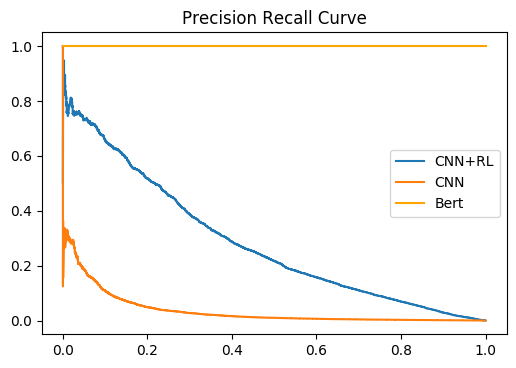

In [34]:
plt.figure(dpi=100)
plt.plot(recall1, prec1, label='CNN+RL', color='blue')
plt.plot(recall2, prec2, label='CNN', color='grey')
plt.plot(recall3, prec3, label='Bert', color='orange')
plt.legend()
plt.title('Precision Recall Curve')

### Plot by labels

In [9]:
def pr_curve_labels(pred_y):
    label_df = pd.read_csv('./data/relation2id.txt', header=None, index_col=None, sep=' ')
    label_list = label_df.iloc[:, 0].to_list()
    precision = dict()
    recall = dict()
    curves = []
    avg_prec = []
    plt.figure(dpi=300)
    for i in range(len(test_y[0])):
        precision[i], recall[i], _ = precision_recall_curve(test_y[:, i],
                                                            pred_y[:, i])
        label_curve, = plt.plot(recall[i], precision[i], lw=2, label=label_list[i])
        avg_prec.append(precision[i].mean())
        curves.append(label_curve)
    sorted_curves = sorted(curves, key=lambda x:avg_prec[curves.index(x)], reverse=True)
    
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(handles=sorted_curves[:10], loc=(1.04, 0))
    plt.title("Precision Recall Curve by Labels")
    return precision, recall

/var/mobile/Containers/Data/Application/668693E9-E4D8-42A3-93E7-6D17A16B005E/Library/Application Support/com.rationalmatter.junoapp/python-home/lib/python3.6/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


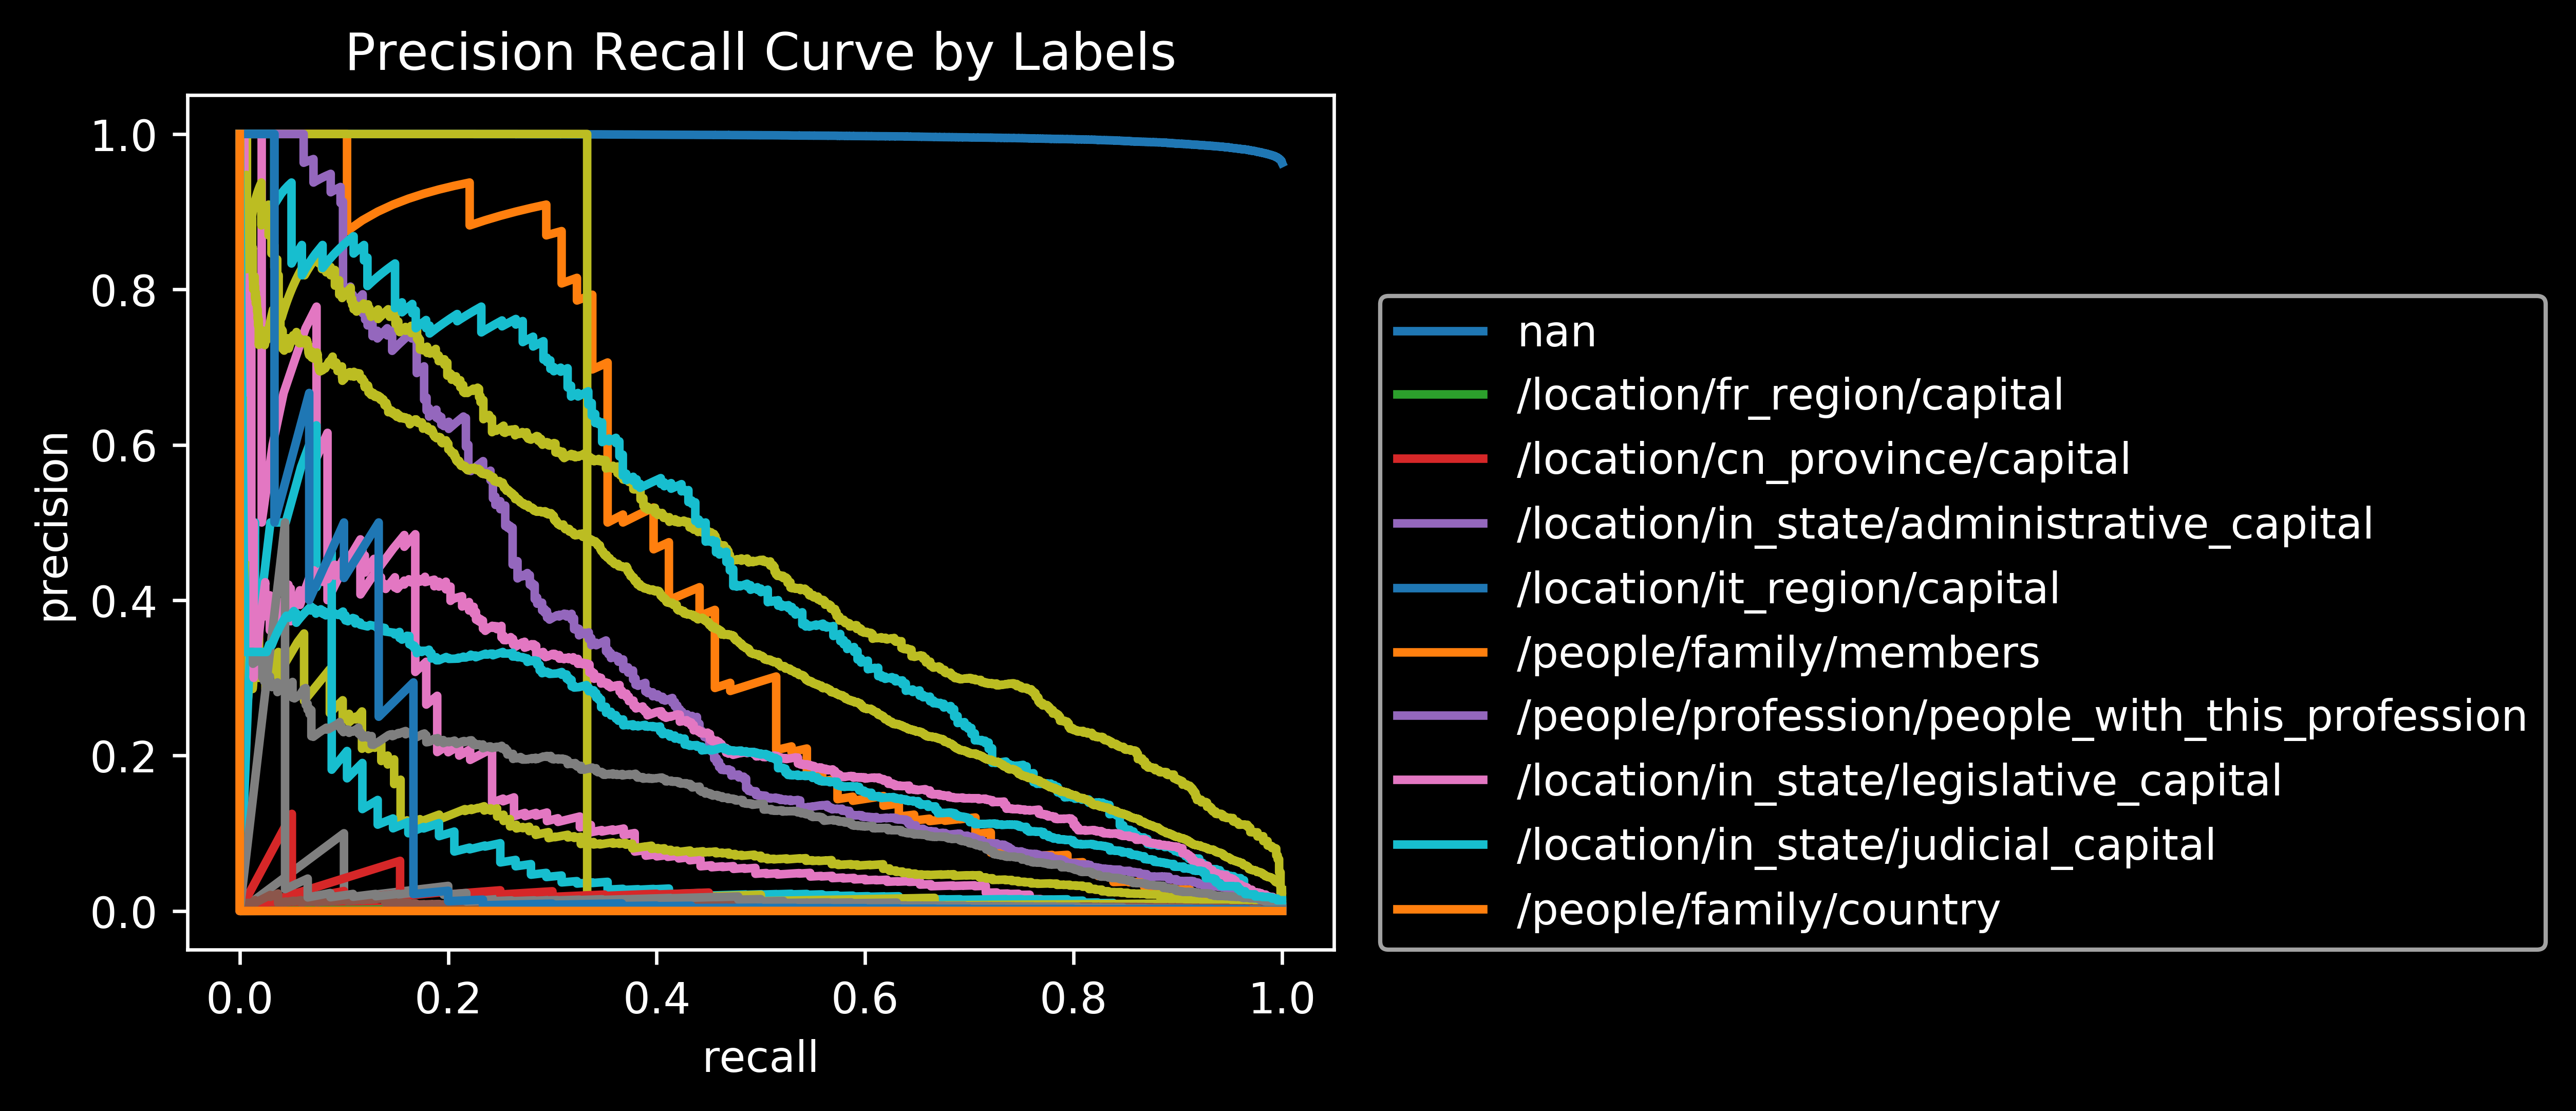

In [10]:
precision1, recall1 = pr_curve_labels(pred1)

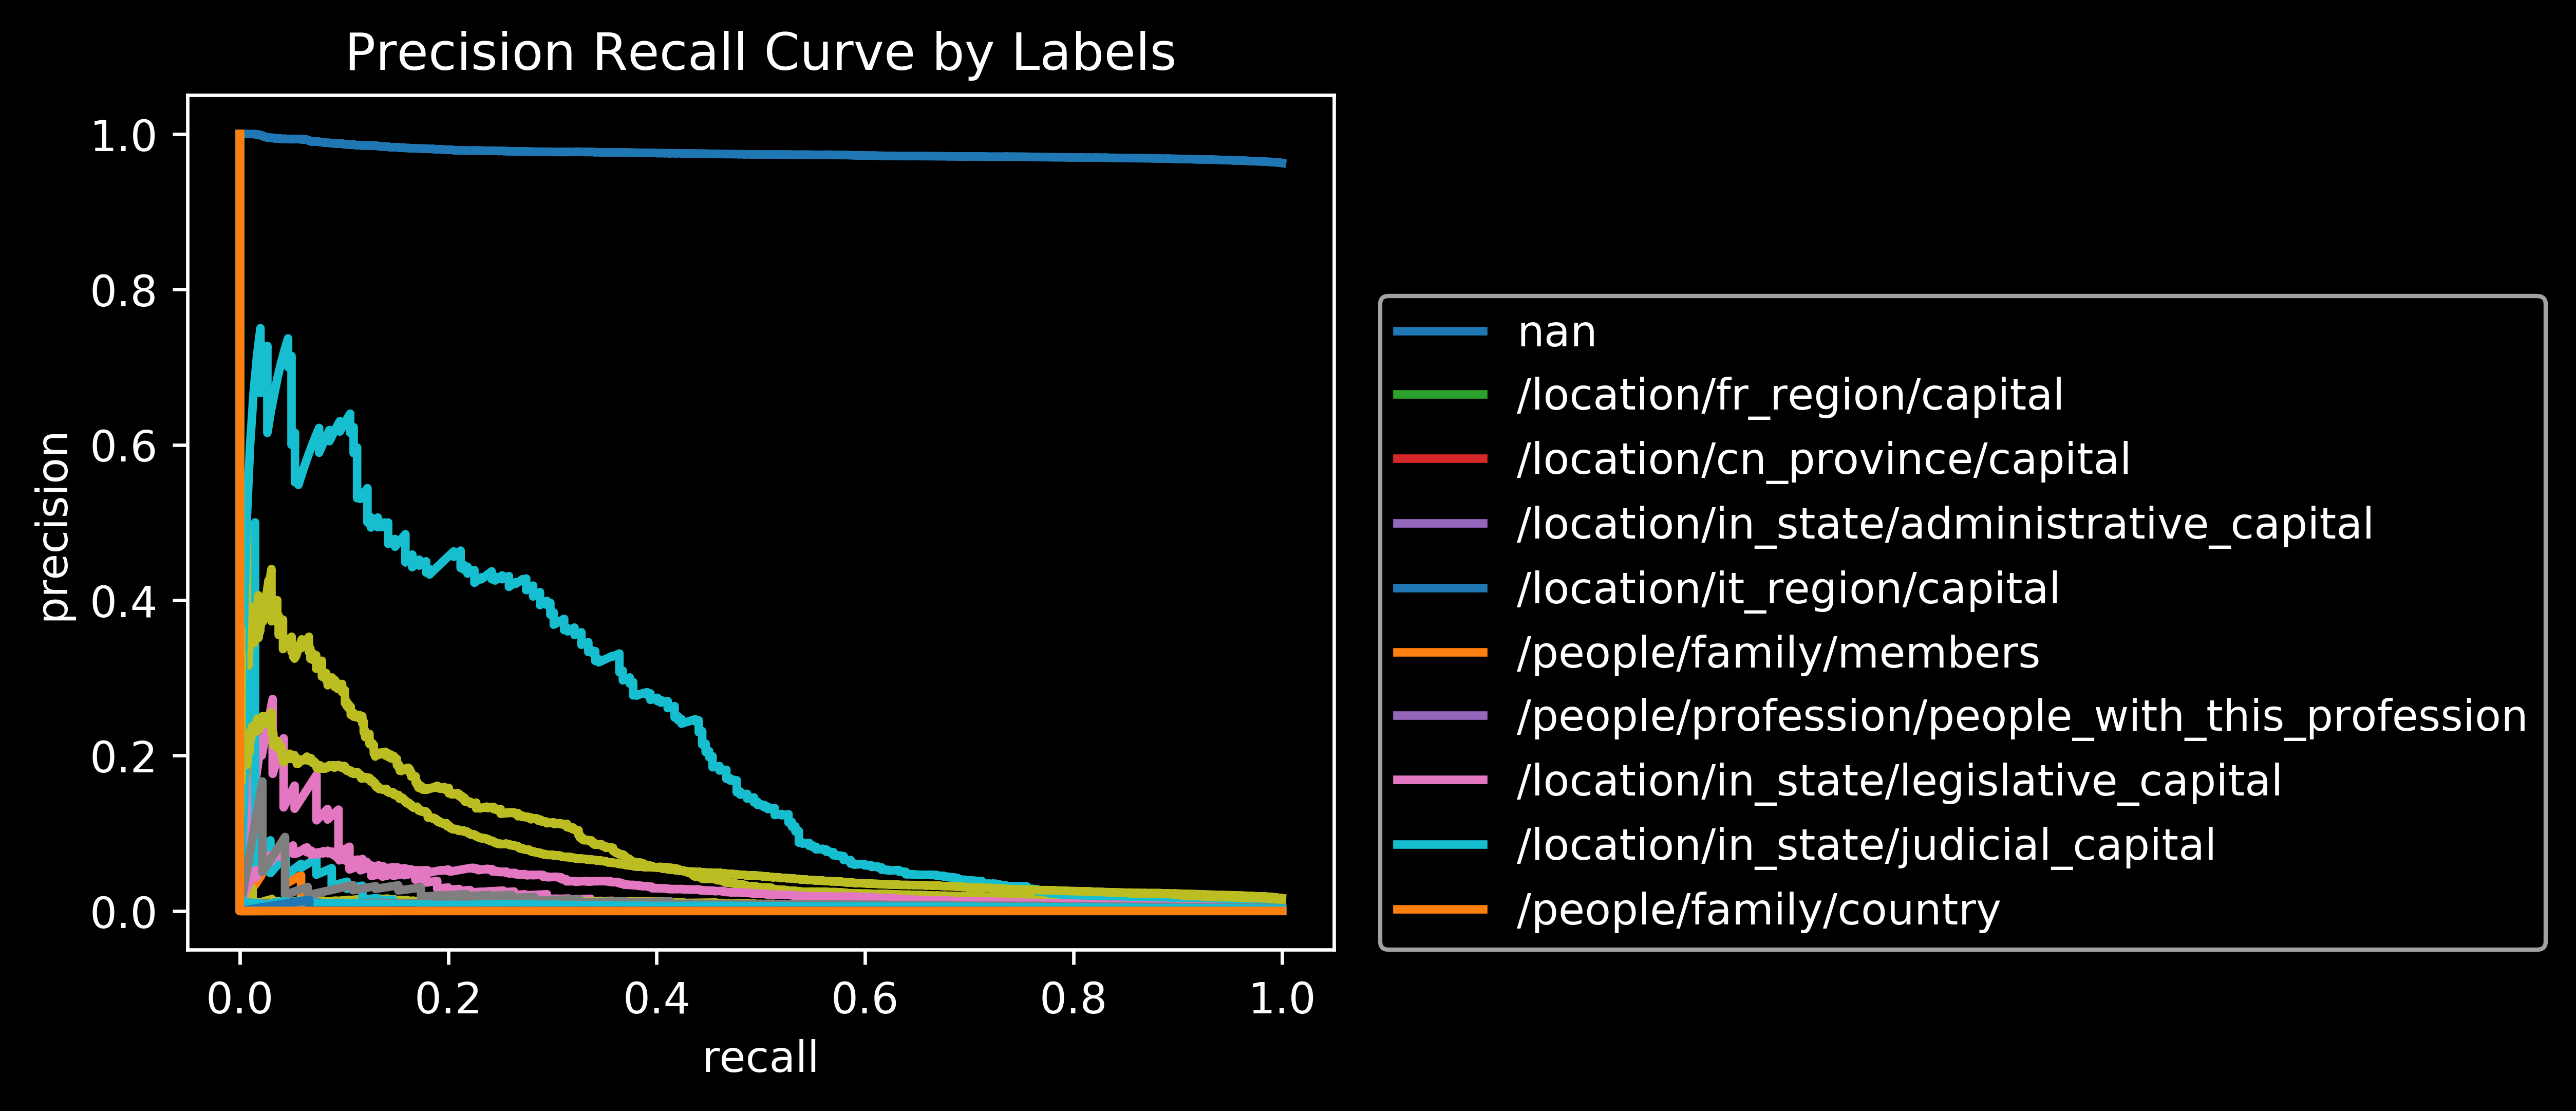

In [11]:
precision2, recall2 = pr_curve_labels(pred2)

In [6]:
test_y_1d = np.array([np.argmax(i) for i in test_y])
pred1_1d = np.array([np.argmax(i) for i in pred1])
pred2_1d = np.array([np.argmax(i) for i in pred2])

In [7]:
from sklearn.metrics import roc_auc_score, auc, f1_score, accuracy_score, balanced_accuracy_score
def analysis(true_y, predict):
    f1_macro = f1_score(true_y, predict, average='macro')
    f1_micro = f1_score(true_y, predict, average='micro')
    f1_weighted = f1_score(true_y, predict, average='weighted')
    
    acc = accuracy_score(true_y, predict)
    balanced_acc = balanced_accuracy_score(true_y, predict)
    
    result = {}
    result['f1_macro'] = f1_macro
    result['f1_micro'] = f1_micro
    result['f1_weighted'] = f1_weighted
    result['acc'] = acc
    result['balanced_acc'] = balanced_acc
    print(result)

In [8]:
from sklearn.metrics import roc_auc_score, auc, f1_score, accuracy_score, balanced_accuracy_score
'''
The result contains 0.
'''
def compare_f1(true_y, predict_1, predict_2):
    f1_cnnrl = f1_score(true_y, predict_1, average='macro')
    f1_cnn = f1_score(true_y, predict_2, average='macro')
    acc_cnnrl = accuracy_score(true_y, predict_1)
    bal_acc_cnnrl = balanced_accuracy_score(true_y, predict_1)
    acc_cnn = accuracy_score(true_y, predict_2)
    bal_acc_cnn = balanced_accuracy_score(true_y, predict_2)
    print('CNN+RL:\n\tF1:', f1_cnnrl)
    print('\tACC:', acc_cnnrl)
    print('\tBalACC:', bal_acc_cnnrl)
    print('CNN:\n\tF1:', f1_cnn)
    print('\tACC:', acc_cnn)
    print('\tBalACC:', bal_acc_cnn)

In [9]:
compare_f1(test_y_1d, pred1_1d, pred2_1d)

CNN+RL:
	F1: 0.10238583827122127
	ACC: 0.962040731118946
	BalACC: 0.0943826566543304
CNN:
	F1: 0.04275417508140422
	ACC: 0.9605446279458155
	BalACC: 0.04228675490277347


In [10]:
mask = []
for i in pred1_1d:
    if i==0:        
        mask.append(False)
    else:
        mask.append(True)
noz_test1_y = test_y_1d[mask]
noz_pred1 = pred1_1d[mask]
analysis(noz_test1_y, noz_pred1)

mask = []
for i in pred2_1d:
    if i==0:        
        mask.append(False)
    else:
        mask.append(True)
noz_test2_y = test_y_1d[mask]
noz_pred2 = pred2_1d[mask]
analysis(noz_test2_y, noz_pred2)

{'f1_macro': 0.2575307451967701, 'f1_micro': 0.4453967376278684, 'f1_weighted': 0.2875322012983325, 'acc': 0.4453967376278684, 'balanced_acc': 0.33466256909481323}
{'f1_macro': 0.097077702062243, 'f1_micro': 0.2372159090909091, 'f1_weighted': 0.10184308091200817, 'acc': 0.2372159090909091, 'balanced_acc': 0.375}


## ROC

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
def draw_roc(true_y, predict):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    fpr['macro'], tpr['macro'], _=roc_curve(true_y.ravel(), predict.ravel())
    roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])
    
    plt.figure()
    plt.plot(fpr['macro'], tpr['macro'], color='orange')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [21]:
draw_roc(test_y_1d, pred1_1d)

ValueError: multiclass format is not supported

In [22]:
from sklearn.metrics import confusion_matrix
def cal_confusion_matrix(true_y, predict):
    label_df = pd.read_csv('./origin_data/relation2id.txt', header=None, index_col=None, sep=' ')
    label_list = label_df.iloc[:, 0].to_list()
    cm = confusion_matrix(true_y, predict)
    return cm

In [29]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    label_df = pd.read_csv('./origin_data/relation2id.txt', header=None, index_col=None, sep=' ')
    label_list = label_df.iloc[:, 0].to_list()
    classes = [i for i in range(len(label_list))]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig1 = plt.figure(figsize=(10, 10), dpi=500)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [35]:
import seaborn as sns

cm = cal_confusion_matrix(test_y_1d, pred1_1d)
cmn = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
label_df = pd.read_csv('./origin_data/relation2id.txt', header=None, index_col=None, sep=' ')
label_list = label_df.iloc[:, 0].to_list()
target_names = [i for i in range(len(label_list))]


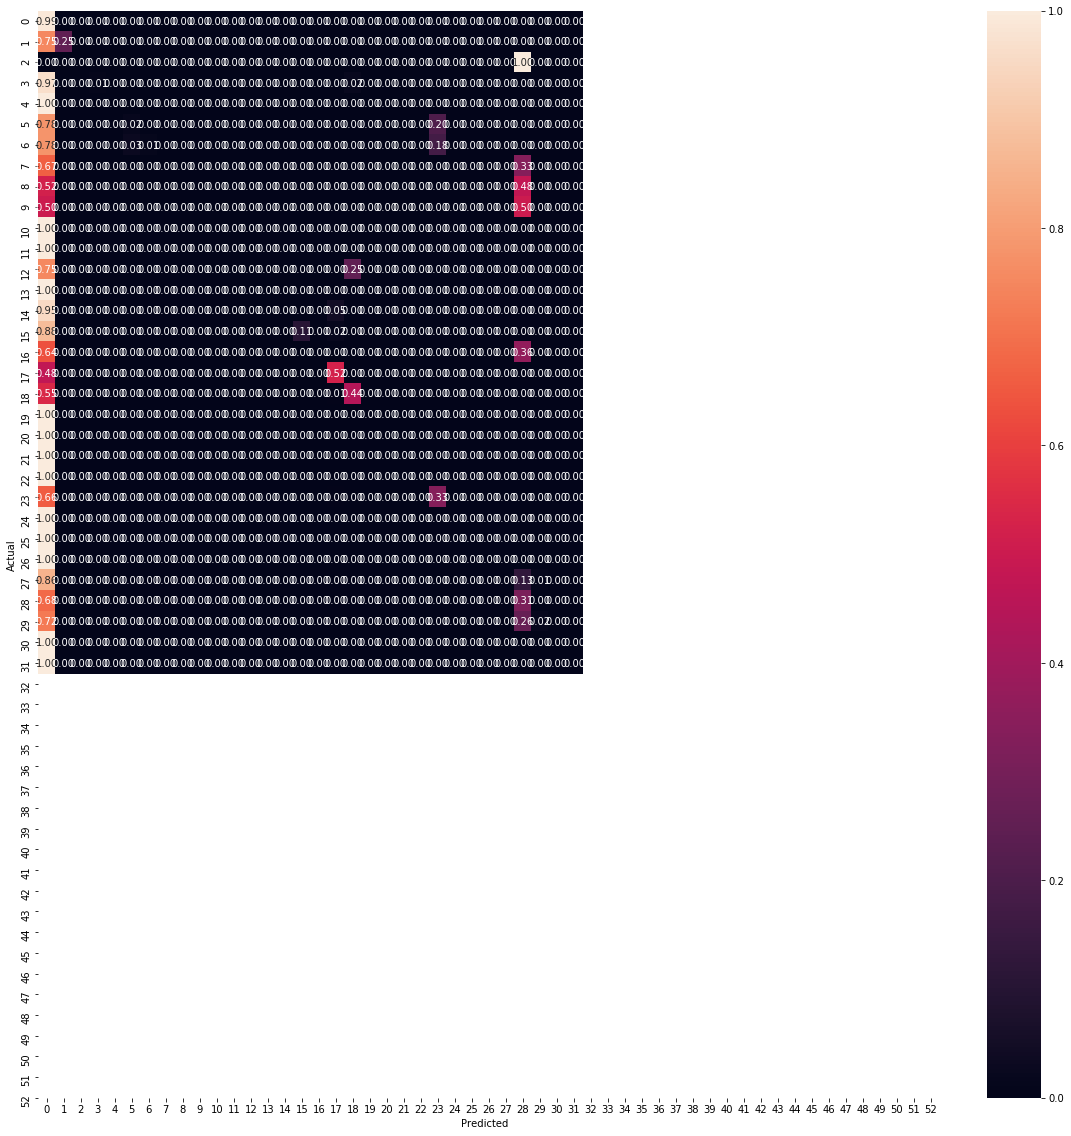

In [39]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=True)

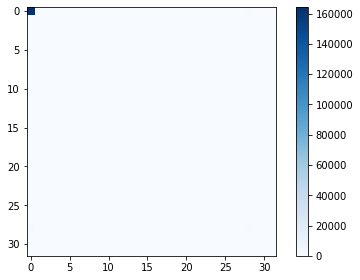

In [41]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.tight_layout()